In [1]:
from durable.lang import *
import threading
import time
import datetime

with ruleset('test'):
    # antecedent
    @when_all(m.subject == 'World')
    def say_hello(c):
        # consequent
        print('test-> Hello {0}'.format(c.m.subject))

post('test', { 'subject': 'World' })

test-> Hello World


{'sid': '0', 'id': 'sid-0', '$s': 1}

In [2]:
with ruleset('animal'):
    @when_all(c.first << (m.predicate == 'eats') & (m.object == 'flies'),
              (m.predicate == 'lives') & (m.object == 'water') & (m.subject == c.first.subject))
    def frog(c):
        c.assert_fact({ 'subject': c.first.subject, 'predicate': 'is', 'object': 'frog' })

    @when_all(c.first << (m.predicate == 'eats') & (m.object == 'flies'),
              (m.predicate == 'lives') & (m.object == 'land') & (m.subject == c.first.subject))
    def chameleon(c):
        c.assert_fact({ 'subject': c.first.subject, 'predicate': 'is', 'object': 'chameleon' })

    @when_all((m.predicate == 'eats') & (m.object == 'worms'))
    def bird(c):
        c.assert_fact({ 'subject': c.m.subject, 'predicate': 'is', 'object': 'bird' })

    @when_all((m.predicate == 'is') & (m.object == 'frog'))
    def green(c):
        c.assert_fact({ 'subject': c.m.subject, 'predicate': 'is', 'object': 'green' })

    @when_all((m.predicate == 'is') & (m.object == 'chameleon'))
    def grey(c):
        c.assert_fact({ 'subject': c.m.subject, 'predicate': 'is', 'object': 'grey' })

    @when_all((m.predicate == 'is') & (m.object == 'bird'))
    def black(c):
        c.assert_fact({ 'subject': c.m.subject, 'predicate': 'is', 'object': 'black' })

    @when_all(+m.subject)
    def output(c):
        print ('animal-> Fact: {0} {1} {2}'.format(c.m.subject, c.m.predicate, c.m.object))

assert_fact('animal', { 'subject': 'Kermit', 'predicate': 'eats', 'object': 'flies' })
assert_fact('animal', { 'subject': 'Kermit', 'predicate': 'lives', 'object': 'water' })
assert_fact('animal', { 'subject': 'Greedy', 'predicate': 'eats', 'object': 'flies' })
assert_fact('animal', { 'subject': 'Greedy', 'predicate': 'lives', 'object': 'land' })
assert_fact('animal', { 'subject': 'Tweety', 'predicate': 'eats', 'object': 'worms' })


animal-> Fact: Kermit eats flies
animal-> Fact: Kermit is green
animal-> Fact: Kermit is frog
animal-> Fact: Kermit lives water
animal-> Fact: Greedy eats flies
animal-> Fact: Greedy is grey
animal-> Fact: Greedy is chameleon
animal-> Fact: Greedy lives land
animal-> Fact: Tweety is black
animal-> Fact: Tweety is bird
animal-> Fact: Tweety eats worms


{'sid': '0', 'id': 'sid-0', '$s': 1}

In [3]:
with ruleset('expense5'):
    @when_all(c.bill << (m.t == 'bill') & (m.invoice.amount > 50),
              c.account << (m.t == 'account') & (m.payment.invoice.amount == c.bill.invoice.amount))
    def approved(c):
        print ('expense5-> bill amount: {0}'.format(c.bill.invoice.amount))
        print ('expense5-> account payment amount: {0}'.format(c.account.payment.invoice.amount))
        
post('expense5', {'t': 'bill', 'invoice': {'amount': 100}})
post('expense5', {'t': 'account', 'payment': {'invoice': {'amount': 100}}})

expense5-> bill amount: 100
expense5-> account payment amount: 100


{'sid': '0', 'id': 'sid-0', '$s': 1}

In [4]:
with ruleset('bookstore'):
    # this rule will trigger for events with status
    @when_all(+m.status)
    def event(c):
        print('bookstore-> Reference {0} status {1}'.format(c.m.reference, c.m.status))

    @when_all(+m.name)
    def fact(c):
        print('bookstore-> Added {0}'.format(c.m.name))
        
    # this rule will be triggered when the fact is retracted
    @when_all(none(+m.name))
    def empty(c):
        print('bookstore-> No books')

assert_fact('bookstore', {
    'name': 'The new book',
    'seller': 'bookstore',
    'reference': '75323',
    'price': 500
})

bookstore-> Added The new book


{'sid': '0', 'id': 'sid-0', '$s': 1}

In [1]:
from durable.lang import *

with ruleset('strings'):
    @when_all(m.subject.matches('hello.*'))
    def starts_with(c):
        print ('string starts with hello -> {0}'.format(c.m.subject))

    @when_all(m.subject.matches('.*hello'))
    def ends_with(c):
        print ('string ends with hello -> {0}'.format(c.m.subject))

    @when_all(m.subject.imatches('.*hello.*'))
    def contains(c):
        print ('string contains hello (case insensitive) -> {0}'.format(c.m.subject))
    
assert_fact('strings', { 'subject': 'HELLO world' })
assert_fact('strings', { 'subject': 'world hello' })
assert_fact('strings', { 'subject': 'hello hi' })
assert_fact('strings', { 'subject': 'has Hello string' })
# assert_fact('strings', { 'subject': 'does not match' })


string contains hello (case insensitive) -> HELLO world
string ends with hello -> world hello
string contains hello (case insensitive) -> world hello
string starts with hello -> hello hi
string contains hello (case insensitive) -> hello hi
string contains hello (case insensitive) -> has Hello string


{'sid': '0', 'id': 'sid-0', '$s': 1}

In [1]:
from durable.lang import *
from durable.engine import Host

def create_host():
    import durable.lang as dlang
    
    host = Host()
    ruleset_definitions = {}
    for name, rset in dlang._rulesets.items():
        full_name, ruleset_definition = rset.define()
        ruleset_definitions[full_name] = ruleset_definition

    host.register_rulesets(ruleset_definitions)
    return host

with ruleset('wordnet'):
    @when_all(m.subject.matches('.*thing.*, entity.*'))
    def matches(c):
        c.s.matches=True
        print ('string matches pat -> {0}'.format(c.m.subject))
    
    @when_all(m.amod.anyItem(item.matches('.*thing.*, entity.*')))
    def amod_with(c):
        c.s.amod_with=True
        print ('amod pat -> {0}'.format(c.m.amod))
    
    @when_all(m.subject.imatches('.*thing.*'))
    def contains(c):        
        print ('string contains pat -> {0}'.format(c.m.subject))

host=create_host()
# assert_fact
r1=host.post('wordnet', { 'subject': 'main.n.01, body_of_water.n.01, thing.n.12, physical_entity.n.01, entity.n.01'})
r2=host.post('wordnet', { 'amod': ['main.n.01, body_of_water.n.01, thing.n.12, physical_entity.n.01, entity.n.01']})
r1, r2

string matches pat -> main.n.01, body_of_water.n.01, thing.n.12, physical_entity.n.01, entity.n.01
amod pat -> ['main.n.01, body_of_water.n.01, thing.n.12, physical_entity.n.01, entity.n.01']


({'sid': '0', 'id': 'sid-0', '$s': 1, 'matches': True},
 {'sid': '0', 'id': 'sid-0', '$s': 1, 'matches': True, 'amod_with': True})

In [75]:
with ruleset('risk'):
    @when_all(c.first << m.t == 'purchase',
              c.second << m.location != c.first.location)
    # the event pair will only be observed once
    def fraud(c):
        print('risk-> Fraud detected -> {0}, {1}'.format(c.first.location, c.second.location))

host=create_host()    
# 'post' submits events, try 'assert' instead and to see differt behavior
host.post('risk', {'t': 'purchase', 'location': 'US'})
host.post('risk', {'t': 'purchase', 'location': 'CA'})

risk-> Fraud detected -> CA, US


{'sid': '0', 'id': 'sid-0', '$s': 1}

In [59]:
[5]+[3]

[5, 3]

In [68]:
from sagas.nlu.nlu_cli import get_chains
ls=lambda l,e: [e] if l is None else l+[e]

with ruleset('chains'):
    @when_all(m.amod.anyItem(item.matches('.*thing.n.*, .*physical_entity.n.*')))
    def amod_with_thing(c):
        c.s.amod_with_thing=True
        c.s.amod=ls(c.s.amod, 'thing')
        print ('amod thing -> {0}'.format(c.m.word))
    
    @when_all(m.amod.anyItem(item.matches('.*natural_object.n.*, .*object.n.*')))
    def amod_with_natural(c):
        c.s.amod_with_natural=True
        c.s.amod=ls(c.s.amod, 'natural')
        print ('amod natural -> {0}'.format(c.m.word))
        
def chains(word, lang, pos):
    resp=get_chains(word, lang, pos)
    if len(resp)>0:
        return [', '.join(chain['chain']) for chain in resp]
    return []

host=create_host()
word='world'
word_chains=chains(word, 'en', 'n')
print(*word_chains, sep='\n')
r3=host.assert_fact('chains', {'word':word, 'amod': word_chains})
# r3=host.post('chains', {'word':word, 'amod': word_chains})
r3

universe.n.01, natural_object.n.01, whole.n.02, object.n.01, physical_entity.n.01, entity.n.01
world.n.02, class.n.03, people.n.01, group.n.01, abstraction.n.06, entity.n.01
world.n.03, experience.n.02, content.n.05, cognition.n.01, psychological_feature.n.01, abstraction.n.06, entity.n.01
earth.n.01
populace.n.01, people.n.01, group.n.01, abstraction.n.06, entity.n.01
world.n.06, part.n.03, thing.n.12, physical_entity.n.01, entity.n.01
worldly_concern.n.01, concern.n.01, interest.n.01, curiosity.n.01, cognitive_state.n.01, psychological_state.n.01, condition.n.01, state.n.02, attribute.n.02, abstraction.n.06, entity.n.01
world.n.08, group.n.01, homo.n.02, abstraction.n.06, hominid.n.01, entity.n.01, primate.n.02, placental.n.01, mammal.n.01, vertebrate.n.01, chordate.n.01, animal.n.01, organism.n.01, living_thing.n.01, whole.n.02, object.n.01, physical_entity.n.01
amod thing -> world
amod natural -> world


{'sid': '0',
 'id': 'sid-0',
 '$s': 1,
 'amod_with_thing': True,
 'amod': ['thing', 'natural'],
 'amod_with_natural': True}

In [25]:
'amod_with' in r2

True

In [66]:
# r3=host.assert_fact('chains', {'word':'new', 'amod': word_chains})
# r3

In [72]:
import glob
import rasa.utils.io as io_utils
intents=[]
for f in glob.glob('/pi/stack/conf/ruleset_*.json'):
    rules = io_utils.read_json_file(f)
    for rule in rules:
        intents.append({rule['intent']: {'triggers': rule['action']}})
intents

[{'behave_purpose': {'triggers': 'action_log_commevent'}}]

.. request is {'lang': 'en', 'sents': 'I want to play music.', 'engine': 'corenlp', 'pipelines': ['predicts']}
meta keys dict_keys(['rel', 'lemma', 'word', 'stems', 'lang', 'sents', 'engine'])
tokens {'xcomp': ['play'], 'nsubj': ['I'], 'punct': ['.']}
words want {'xcomp': 'play', 'nsubj': 'I', 'punct': '.'}
lemmas {'xcomp': 'play', 'nsubj': 'I', 'punct': '.'}
chunks [nsubj: I, xcomp: to play music, punct: .]
✁ dependency-graph. -------------------------
+----+---------+--------+---------+--------+--------+
|    |   index | text   | lemma   | upos   | xpos   |
|----+---------+--------+---------+--------+--------|
|  0 |       1 | I      | I       | PRON   | PRP    |
|  1 |       2 | want   | want    | VERB   | VBP    |
|  2 |       3 | to     | to      | PART   | TO     |
|  3 |       4 | play   | play    | VERB   | VB     |
|  4 |       5 | music  | music   | NOUN   | NN     |
|  5 |       6 | .      | .       | PUNCT  | .      |
+----+---------+--------+---------+--------+--------+
('

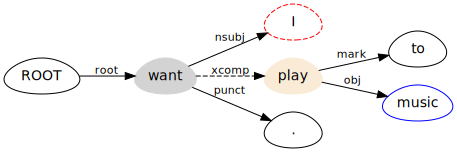

In [31]:
from sagas.nlu.corenlp_parser import get_chunks
from sagas.nlu.rules_meta import build_meta
from sagas.nlu.inspector_common import Inspector, Context, non_spaces
from sagas.conf.conf import cf
from sagas.nlu.utils import fix_sents
from sagas.nlu.uni_remote import dep_parse
from sagas.nlu.uni_remote_viz import list_contrast, display_doc_deps

def parse_sents(data):
    sents, source=data['sents'], data['lang']
    sents=fix_sents(sents, source)
    engine=cf.engine(source)
    doc_jsonify, resp = dep_parse(sents, source, engine, ['predicts'])
    return doc_jsonify, resp

lang='en'
data = {'lang': lang, "sents": 'I want to play music.', 'engine': cf.engine(lang)}
doc_jsonify,resp=parse_sents(data)
rs = get_chunks(doc_jsonify)

if lang in non_spaces:
    delim=''
else:
    delim=' '
for serial, r in enumerate(rs):
    meta = build_meta(r, data)
    domains=r['domains']
    # print([(x[0], x[2]) for x in domains])
    #
    keys={x[0] for x in domains}
    grp=lambda p, idx: [x[idx] for x in domains if x[0]==p]    
    tokens={x:grp(x,2) for x in keys}
    words={x:delim.join(grp(x,2)) for x in keys}
    lemmas={x:delim.join(grp(x,3)) for x in keys}
    print('meta keys', meta.keys())
    print('tokens', tokens)
    print('words', meta['word'], words)
    print('lemmas', lemmas)
    # 
    ctx=Context(meta, domains)
    # print(ctx.lemmas)
    print('chunks', ctx._chunks)
    
g=display_doc_deps(doc_jsonify, resp)
print(*[(w.index, w.text, w.governor, doc_jsonify.words[w.governor-1].text) for w in doc_jsonify.words], sep='\n')
display(g)

In [23]:
doc_jsonify.words[0].ctx

{'index': '1',
 'text': 'I',
 'lemma': 'I',
 'upos': 'PRON',
 'xpos': 'PRP',
 'feats': 'Case=Nom|Number=Sing|Person=1|PronType=Prs',
 'governor': 2,
 'dependency_relation': 'nsubj'}

In [21]:
import jsonpickle
print(json.dumps(json.loads(jsonpickle.encode(doc_jsonify.words)), indent=2))

[
  {
    "py/object": "sagas.nlu.uni_jsonifier.JsonifyWordImpl",
    "ctx": {
      "dependency_relation": "nsubj",
      "feats": "Case=Nom|Number=Sing|Person=1|PronType=Prs",
      "governor": 2,
      "index": "1",
      "lemma": "I",
      "text": "I",
      "upos": "PRON",
      "xpos": "PRP"
    }
  },
  {
    "py/object": "sagas.nlu.uni_jsonifier.JsonifyWordImpl",
    "ctx": {
      "dependency_relation": "root",
      "feats": "Mood=Ind|Tense=Pres|VerbForm=Fin",
      "governor": 0,
      "index": "2",
      "lemma": "want",
      "text": "want",
      "upos": "VERB",
      "xpos": "VBP"
    }
  },
  {
    "py/object": "sagas.nlu.uni_jsonifier.JsonifyWordImpl",
    "ctx": {
      "dependency_relation": "mark",
      "feats": "_",
      "governor": 4,
      "index": "3",
      "lemma": "to",
      "text": "to",
      "upos": "PART",
      "xpos": "TO"
    }
  },
  {
    "py/object": "sagas.nlu.uni_jsonifier.JsonifyWordImpl",
    "ctx": {
      "dependency_relation": "xcomp",
  

In [59]:
# x={'y':'y', 'x':'x'}
# x.extend({'z':'z'})

In [32]:
equals=lambda a, b:str(a) == str(b)
def children(word, sent):
    return filter(lambda w: equals(w.governor, word.index), sent.words)

def extract(l):
    keys={x['dependency_relation'] for x in l}
    grp = lambda p, col: [x[col] for x in l if x['dependency_relation'] == p]
    text_chunks={x:delim.join(grp(x, 'text')) for x in keys}
    lemma_chunks={x:delim.join(grp(x, 'lemma')) for x in keys}
    rs={}
    for e in l:
        e['text']=text_chunks[e['dependency_relation']]
        e['lemma']=lemma_chunks[e['dependency_relation']]
        rs[e['dependency_relation']]=e
    return rs

def group_by(l, field='dependency_relation'):
    keys={x[field] for x in l}
    grp = lambda p: [x for x in l if x[field] == p]
    return {key:grp(key) for key in keys}
    
def get_verb_domain(sent):
    from sagas.nlu.uni_intf import sub_comps
    rs = []
    
    verbs=list(filter(lambda w: w.upos == "VERB", sent.words))
    if len(verbs)>1:
        # filter the verbs which in clausal complement
        verbs=[word for word in verbs if word.dependency_relation not in sub_comps]
    for word in verbs:
        domains = []
        stems=[]
        for c in filter(lambda w: equals(w.governor, word.index), sent.words):
            c_domains=[w.ctx for w in children(c, sent)]
            domains.append({**c.ctx, **group_by(c_domains)})
           
        token={**word.ctx, **group_by(domains)}        
        # add governor as head domain     
        if word.governor!=0:
            head=sent.words[word.governor - 1]  
            token['head']=head.ctx
        rs.append(token)
    return rs

v_domains=get_verb_domain(doc_jsonify)
v_domains

[{'index': '2',
  'text': 'want',
  'lemma': 'want',
  'upos': 'VERB',
  'xpos': 'VBP',
  'feats': 'Mood=Ind|Tense=Pres|VerbForm=Fin',
  'governor': 0,
  'dependency_relation': 'root',
  'xcomp': [{'index': '4',
    'text': 'play',
    'lemma': 'play',
    'upos': 'VERB',
    'xpos': 'VB',
    'feats': 'VerbForm=Inf',
    'governor': 2,
    'dependency_relation': 'xcomp',
    'obj': [{'index': '5',
      'text': 'music',
      'lemma': 'music',
      'upos': 'NOUN',
      'xpos': 'NN',
      'feats': 'Number=Sing',
      'governor': 4,
      'dependency_relation': 'obj'}],
    'mark': [{'index': '3',
      'text': 'to',
      'lemma': 'to',
      'upos': 'PART',
      'xpos': 'TO',
      'feats': '_',
      'governor': 4,
      'dependency_relation': 'mark'}]}],
  'nsubj': [{'index': '1',
    'text': 'I',
    'lemma': 'I',
    'upos': 'PRON',
    'xpos': 'PRP',
    'feats': 'Case=Nom|Number=Sing|Person=1|PronType=Prs',
    'governor': 2,
    'dependency_relation': 'nsubj'}],
  'punct':

In [79]:
import json_utils
json_utils.write_json_to_file('./out/v_domain.json', v_domains[0])

In [69]:
vd=v_domains[0]
top='ref'
rs=[]
filters=('pron', 'punct', 'part')
# filters=()
def get_words(domains, top):
    upos=domains['upos'].lower()    
    word=domains['text']
    lemma=domains['lemma']
    rel=domains['dependency_relation']
    key=f"{top}"
    if upos not in filters:
        rs.append({key:f"{word}/{lemma}", 'upos':upos})
    for k,v in domains.items():
        if isinstance(v, list):
            for child in v:                
                get_words(child, key+'_'+k)

get_words(vd, top)
rs

[{'ref': 'want/want', 'upos': 'verb'},
 {'ref_xcomp': 'play/play', 'upos': 'verb'},
 {'ref_xcomp_obj': 'music/music', 'upos': 'noun'}]

In [7]:
# message=v_domains[0]
# json.dumps(message, ensure_ascii=False)

In [23]:
from durable.lang import *
from durable.engine import Host

def create_host():
    import durable.lang as dlang
    
    host = Host()
    ruleset_definitions = {}
    for name, rset in dlang._rulesets.items():
        full_name, ruleset_definition = rset.define()
        ruleset_definitions[full_name] = ruleset_definition

    host.register_rulesets(ruleset_definitions)
    return host

with ruleset('verbs'):
    @when_all(m.text.matches('want.*'))
    def verb_want(c):
        c.s.matches=True
        print ('verb matches pat -> {0}'.format(c.m.text))
    
    @when_all(m.amod_ref.anyItem(item.matches('.*thing.*, entity.*')))
    def amod_ref(c):
        c.s.amod_ref=True
        print ('amod_ref pat -> {0}'.format(c.domains.amod))
    
    @when_all(m.xcomp.anyItem(item.text.matches('play') & 
                              item.obj.anyItem(item.text.matches('music'))))
    def xcomp_play(c):        
        c.s.xcomp_play=True
        # print ('xcomp pat -> {0}'.format(c.m.xcomp)) 
        print ('xcomp pat')
    
    @when_all(m.nsubj.anyItem(item.text.imatches('I')))
    def subj_play(c):        
        # print ('xcomp pat -> {0}'.format(c.m.domains.xcomp.text))
        print ('nsubj pat')

host=create_host()
# assert_fact
#for v in v_domains:
    # print(v)
    # r1=host.post('verbs', json.dumps(v, ensure_ascii=False))

# v={"domains": {"nsubj": {"index": "1", "text": "I", "lemma": "I", "upos": "PRON", "xpos": "PRP", "feats": "Case=Nom|Number=Sing|Person=1|PronType=Prs", "governor": 2, "dependency_relation": "nsubj", "domains": {}}, "xcomp": {"index": "4", "text": "play", "lemma": "play", "upos": "VERB", "xpos": "VB", "feats": "VerbForm=Inf", "governor": 2, "dependency_relation": "xcomp", "domains": {"mark": {"index": "3", "text": "to", "lemma": "to", "upos": "PART", "xpos": "TO", "feats": "_", "governor": 4, "dependency_relation": "mark"}, "obj": {"index": "5", "text": "music", "lemma": "music", "upos": "NOUN", "xpos": "NN", "feats": "Number=Sing", "governor": 4, "dependency_relation": "obj"}}}, "punct": {"index": "6", "text": ".", "lemma": ".", "upos": "PUNCT", "xpos": ".", "feats": "_", "governor": 2, "dependency_relation": "punct", "domains": {}}}, "index": "2", "text": "want", "lemma": "want", "upos": "VERB", "xpos": "VBP", "feats": "Mood=Ind|Tense=Pres|VerbForm=Fin", "governor": 0, "dependency_relation": "root"}
# v={'nsubj': [{'index': '1', 'text': 'I'}],
#    "index": "2", "text": "want", "lemma": "want", "upos": "VERB", "xpos": "VBP", "feats": "Mood=Ind|Tense=Pres|VerbForm=Fin", "governor": 0, "dependency_relation": "root"}
v=v_domains[0]
r1=host.assert_fact('verbs', v)
r1

verb matches pat -> want
xcomp pat
nsubj pat


{'sid': '0', 'id': 'sid-0', '$s': 1, 'matches': True, 'xcomp_play': True}

In [37]:
root = next(w for w in doc_jsonify.words if w.dependency_relation in ('root', 'hed'))
root

<JsonifyWordImpl index=2;text=want;lemma=want;upos=VERB;xpos=VBP;feats=Mood=Ind|Tense=Pres|VerbForm=Fin;governor=0;dependency_relation=root>

In [47]:
[(w.index, w.text, w.governor, doc_jsonify.words[w.governor-1].text) for w in doc_jsonify.words]

[('1', 'I', 2, 'want'),
 ('2', 'want', 0, '.'),
 ('3', 'to', 4, 'play'),
 ('4', 'play', 2, 'want'),
 ('5', 'music', 4, 'play'),
 ('6', '.', 2, 'want')]

In [40]:
doc_jsonify.words[0]

<JsonifyWordImpl index=1;text=I;lemma=I;upos=PRON;xpos=PRP;feats=Case=Nom|Number=Sing|Person=1|PronType=Prs;governor=2;dependency_relation=nsubj>